Since, we haven't been given any data, we'll generate our own synthetic data

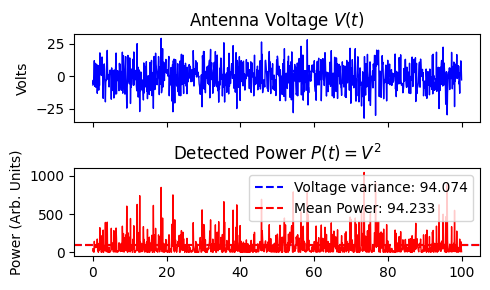

In [14]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 100, 1000)
voltage = np.random.normal(0, 10, 1000)
power = voltage**2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), sharex=True)

ax1.plot(time, voltage, color='blue', lw=1)
ax2.axhline(np.var(voltage), color='blue', linestyle='--', label=f'Voltage variance: {np.var(voltage):.3f}')
ax1.set_title("Antenna Voltage $V(t)$")
ax1.set_ylabel("Volts")

ax2.plot(time, power, color='red', lw=1)
ax2.axhline(np.mean(power), color='red', linestyle='--', label=f'Mean Power: {np.mean(power):.3f}')
ax2.set_title("Detected Power $P(t) = V^2$")
ax2.set_ylabel("Power (Arb. Units)")
ax2.legend()

plt.tight_layout()
plt.show()

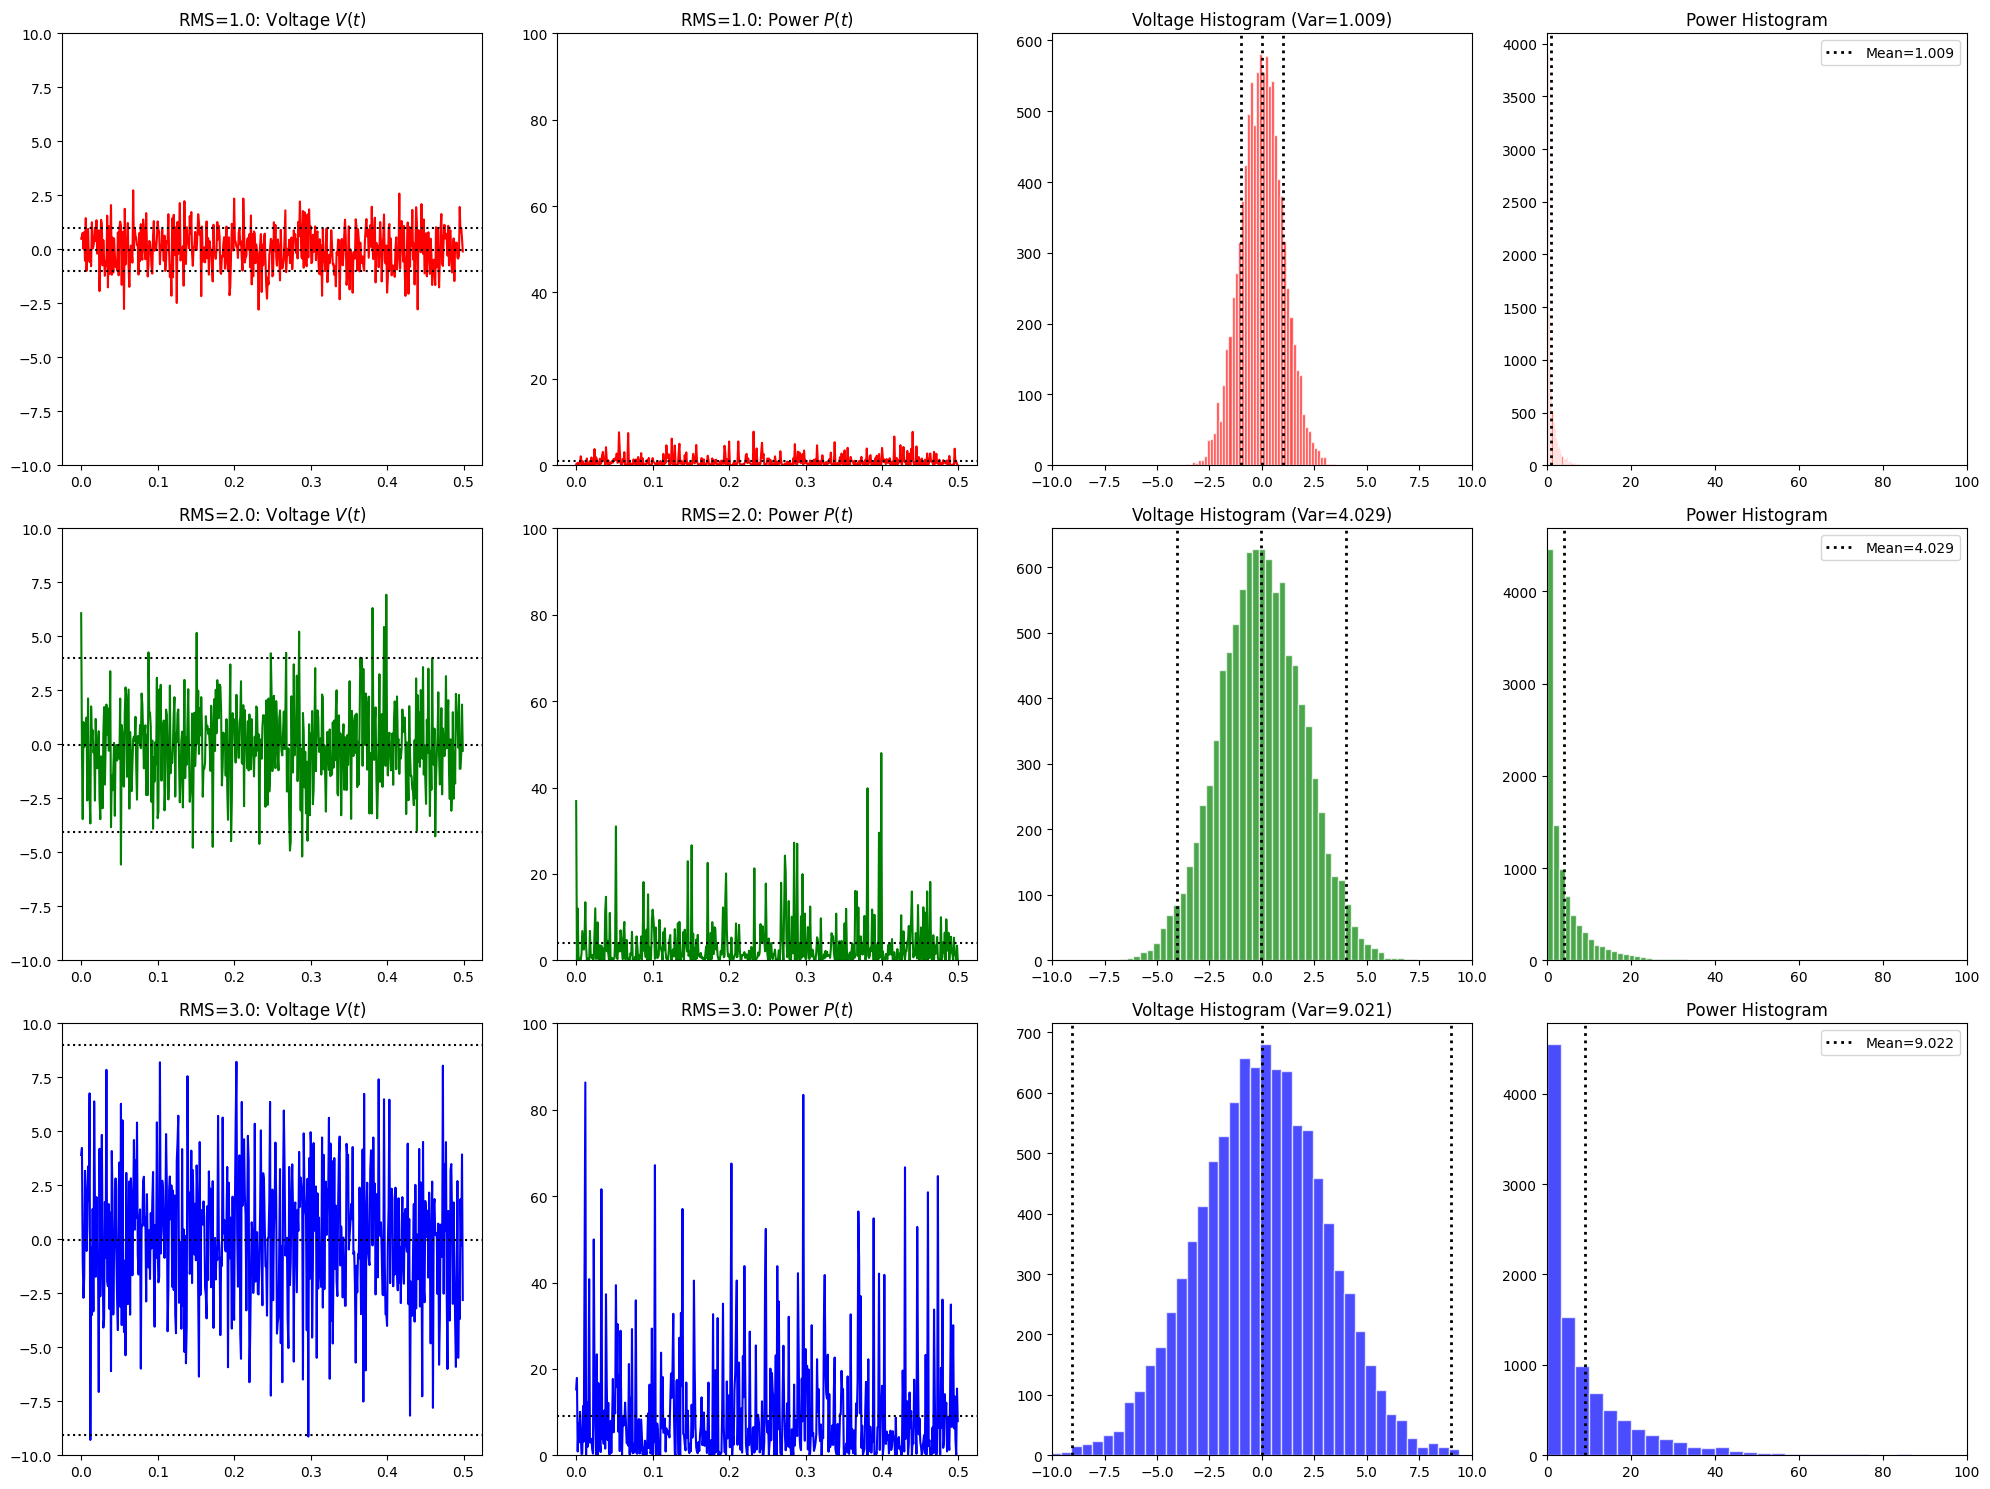

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, (rms, color) in enumerate(zip([1.0, 2.0, 3.0], ['red', 'green', 'blue'])):
    v = np.random.normal(0, rms, 10000)
    p = v**2
    v_mean, v_var = np.mean(v), np.var(v)
    p_mean = np.mean(p)

    t_partial = np.linspace(0, 10, 10000)[:500]
    v_partial = v[:500]
    p_partial = p[:500]

    axes[i, 0].plot(t_partial, v_partial, color=color)
    axes[i, 0].axhline(v_mean, color='black', ls='dotted', lw=1.5)
    axes[i, 0].axhline(v_mean + v_var, color='black', ls='dotted', lw=1.5)
    axes[i, 0].axhline(v_mean - v_var, color='black', ls='dotted', lw=1.5)
    axes[i, 0].set_title(f'RMS={rms}: Voltage $V(t)$')
    axes[i, 0].set_ylim(-10, 10)

    axes[i, 1].plot(t_partial, p_partial, color=color)
    axes[i, 1].axhline(p_mean, color='black', ls='dotted', lw=1.5)
    axes[i, 1].set_title(f'RMS={rms}: Power $P(t)$')
    axes[i, 1].set_ylim(0, 100)

    axes[i, 2].hist(v, bins=50, color=color, edgecolor='white', alpha=0.7)
    axes[i, 2].axvline(v_mean, color='black', ls='dotted', lw=2)
    axes[i, 2].axvline(v_mean + v_var, color='black', ls='dotted', lw=2)
    axes[i, 2].axvline(v_mean - v_var, color='black', ls='dotted', lw=2)
    axes[i, 2].set_title(f'Voltage Histogram (Var={v_var:.3f})')
    axes[i, 2].set_xlim(-10, 10)

    axes[i, 3].hist(p, bins=50, color=color, edgecolor='white', alpha=0.7)
    axes[i, 3].axvline(p_mean, color='black', ls='dotted', lw=2, label=f'Mean={p_mean:.3f}')
    axes[i, 3].set_title('Power Histogram')
    axes[i, 3].set_xlim(0, 100)
    axes[i, 3].legend()

plt.tight_layout()
plt.show()

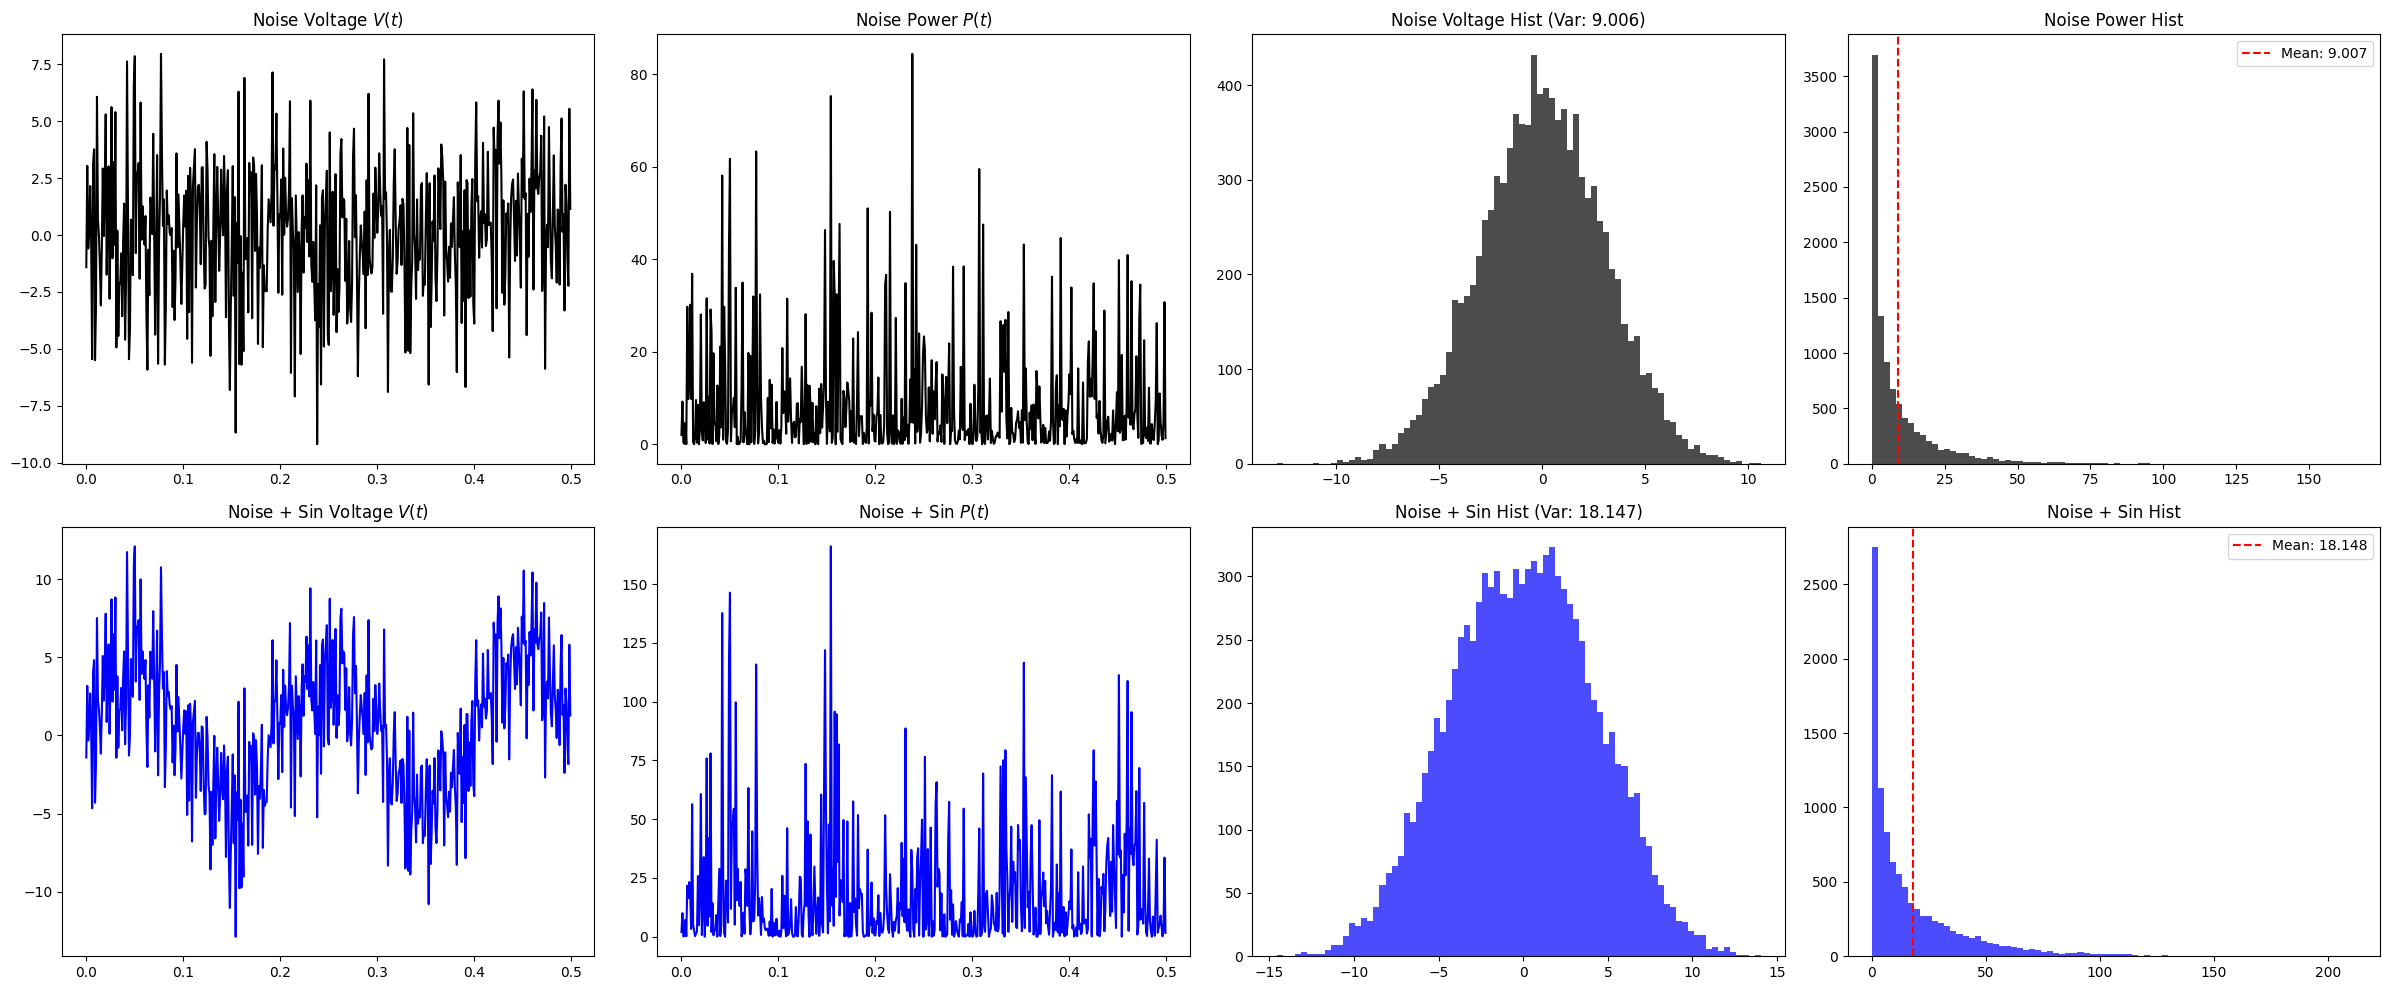

In [27]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 10000)
v_noise = np.random.normal(0, 3, 10000)
v_combined = v_noise + (np.sqrt(2) * 3) * np.sin(2 * np.pi * 5 * t)

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
view = 500

axes[0, 0].plot(t[:view], v_noise[:view], color='black')
axes[0, 0].set_title('Noise Voltage $V(t)$')
axes[0, 1].plot(t[:view], v_noise[:view]**2, color='black')
axes[0, 1].set_title('Noise Power $P(t)$')
axes[0, 2].hist(v_noise, bins=80, color='black', alpha=0.7)
axes[0, 2].set_title(f'Noise Voltage Hist (Var: {np.var(v_noise):.3f})')
axes[0, 3].hist(v_noise**2, bins=80, color='black', alpha=0.7)
axes[0, 3].axvline(np.mean(v_noise**2), color='red', ls='--', label=f'Mean: {np.mean(v_noise**2):.3f}')
axes[0, 3].set_title('Noise Power Hist')
axes[0, 3].legend()

axes[1, 0].plot(t[:view], v_combined[:view], color='blue')
axes[1, 0].set_title('Noise + Sin Voltage $V(t)$')
axes[1, 1].plot(t[:view], v_combined[:view]**2, color='blue')
axes[1, 1].set_title('Noise + Sin $P(t)$')
axes[1, 2].hist(v_combined, bins=80, color='blue', alpha=0.7)
axes[1, 2].set_title(f'Noise + Sin Hist (Var: {np.var(v_combined):.3f})')
axes[1, 3].hist(v_combined**2, bins=80, color='blue', alpha=0.7)
axes[1, 3].axvline(np.mean(v_combined**2), color='red', ls='--', label=f'Mean: {np.mean(v_combined**2):.3f}')
axes[1, 3].set_title('Noise + Sin Hist')
axes[1, 3].legend()

plt.tight_layout()
plt.show()

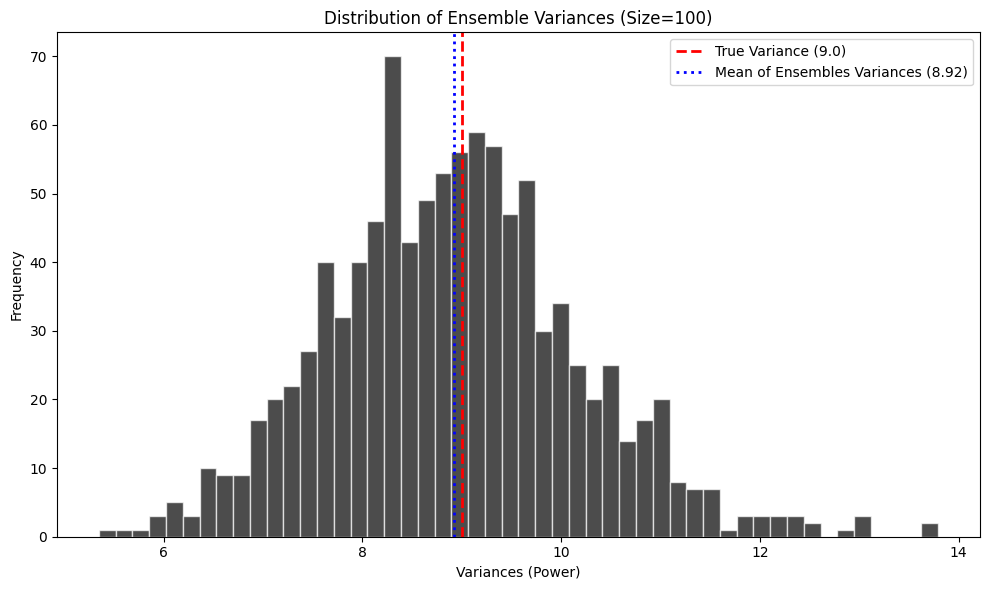

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
full_signal = np.random.normal(0, 3.0, 100000)
ensemble_variances = np.var(full_signal[:(100000 // 100) * 100].reshape(100000 // 100, 100), axis=1)

plt.figure(figsize=(10, 6))
plt.hist(ensemble_variances, bins=50, color='black', alpha=0.7, edgecolor='white')
plt.axvline(3.0**2, color='red', linestyle='--', linewidth=2, label=f'True Variance ({3.0**2})')
plt.axvline(np.mean(ensemble_variances), color='blue', linestyle=':', linewidth=2, label=f'Mean of Ensembles Variances ({np.mean(ensemble_variances):.2f})')
plt.title('Distribution of Ensemble Variances (Size=100)')
plt.xlabel('Variances (Power)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()